<a href="https://colab.research.google.com/github/elnaggar96/ahmed-elnagar/blob/main/NLP_Projet_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

#libraries for NLP
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from tqdm import tqdm
from IPython.display import HTML
#!pip install chart_studio
import plotly
import plotly.subplots
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.express as px
from collections import defaultdict
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Conv1D, Bidirectional, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
import os
import joblib
import ydata_profiling
from pycaret.classification import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 import our disaster tweet dataset

In [4]:
data = pd.read_csv("/content/train.csv")
Testdata =pd.read_csv('/content/test.csv')

Check head and info of the data


In [5]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
data.shape

(7613, 5)

In [ ]:
#Count of duplicate values
data.duplicated().sum()

0

In [8]:
data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [10]:
data["target"].value_counts(normalize = True) #normalized value counts

0    0.57034
1    0.42966
Name: target, dtype: float64

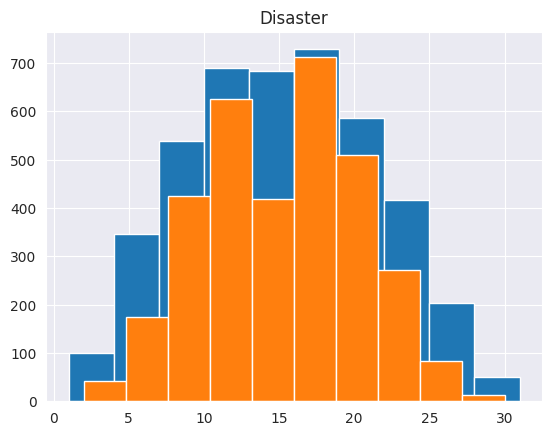

In [11]:
def length_plot(data, name):
  length = [len(sentence.split()) for sentence in data]
  plt.hist(length)
  plt.title(name)
length_plot(data[data["target"]==0]["text"], "Not Disaster")
length_plot(data[data["target"]==1]["text"], "Disaster")

Missing data
AND Data in each class

In [ ]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [12]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
percent_missing
missing_value_df

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

,column_name,percent_missing
id,id,0.000000
keyword,keyword,0.801261
location,location,33.272035
text,text,0.000000
target,target,0.000000


 separate the dependent and independent features

In [13]:
X = data["text"] # indpendent feature
y = data["target"] # dependent feature
y = np.array(y) # converting to array

Calculating the number of unique words present in the disaster tweets

In [14]:
def unq_words(sentence):
  unq_words_list = []
  for sent in tqdm(sentence):
    for word in sent.split():
      if word.lower() not in unq_words_list:
        unq_words_list.append(word.lower())
      else:
        pass
  return unq_words_list
unique_words = unq_words(X)
print("Total unique words present :",len(unique_words))

100%|██████████| 7613/7613 [00:06<00:00, 1145.26it/s]

Total unique words present : 27983


In [15]:
unique_words[:15]

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 '#earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all',
 'forest',
 'fire']

words starting with “#”

In [16]:
SYMBOL_1 = "#"
sym1_words = [word for word in unique_words if word.startswith(SYMBOL_1)]
len(sym1_words)

1965

words starting with “@”

In [17]:
SYMBOL_2 = "@"
sym2_words = [word for word in unique_words if word.startswith(SYMBOL_2)]
len(sym2_words)

2264

remove the  urls present

In [18]:
def url_remover(text):
    url_patterns = re.compile(r'https?://S+|www.S+')
    return url_patterns.sub(r'', text)

In [19]:
# Tokenization of paragraphs/sentences
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

Top 15 locations of the data

In [ ]:
data["location"].nunique()

3341

In [20]:
data.location.value_counts()[:15].to_frame()

,location
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24
Mumbai,22


<Axes: xlabel='location'>

Text(0.5, 1.0, 'Top 15 locations')

Text(0.5, 0, 'Count of locations')

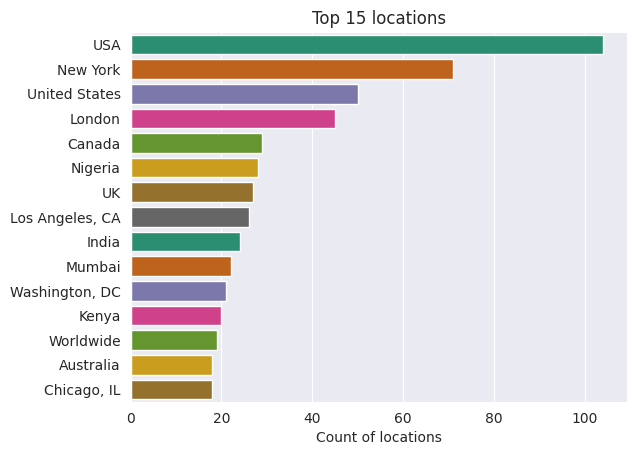

In [21]:
word_plot=data['location'].value_counts()[:15]
sns.barplot(x=word_plot,y=word_plot.index,palette='Dark2')
plt.title("Top 15 locations")
plt.xlabel("Count of locations")

Top 15 keyword in the data

In [ ]:
data["keyword"].nunique()

221

In [22]:
data.keyword.value_counts()[:15].to_frame()


,keyword
fatalities,45
deluge,42
armageddon,42
sinking,41
damage,41
harm,41
body%20bags,41
outbreak,40
evacuate,40
fear,40


<Axes: xlabel='keyword'>

Text(0.5, 1.0, 'Top 15 Keywords')

Text(0.5, 0, 'Count of Keywords')

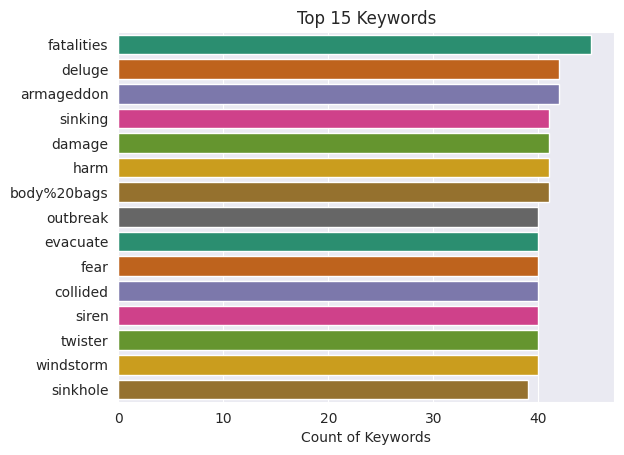

In [23]:
word_plot=data['keyword'].value_counts()[:15]
sns.barplot(x=word_plot,y=word_plot.index,palette='Dark2')
plt.title("Top 15 Keywords")
plt.xlabel("Count of Keywords")

Unique Words

In [24]:
X = data["text"] # indpendent feature
def uniq_words(sentence):
  uniq_words_list = []
  for sent in tqdm(sentence):
    for word in sent.split():
      if word.lower() not in uniq_words_list:
        uniq_words_list.append(word.lower())
      else:
        pass
  return uniq_words_list
unique_words = uniq_words(X)
print("Total unique words present :",len(unique_words))


100%|██████████| 7613/7613 [00:05<00:00, 1433.12it/s]

Total unique words present : 27983


In [25]:
unique_words[:15]

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 '#earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all',
 'forest',
 'fire']

removed un necessary symbols stopwords

In [26]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
def preprocessing(text):
  tweets = []
  for sentence in tqdm(text):
    sentence = sentence.lower() # converting the words to lower case
    sentence =  url_remover(sentence) # removing the url from the sentence
    sentence = re.sub(r'@w+',  '', sentence).strip() # removing the words starts with "@"
    sentence = re.sub("[^a-zA-Z0-9 ']", "", sentence) # removing symbols
    sentence = sentence.split()
    sentence1 = [wl.lemmatize(word) for word in sentence if word not in set(stopwords.words("english"))] #lemmatization and stopwrds removal from tweets
    sentence1 = " ".join(sentence1)
    tweets.append(sentence1)
  return tweets
tweets = preprocessing(X)

100%|██████████| 7613/7613 [00:11<00:00, 654.39it/s]


In [27]:
from tensorflow.keras.layers import (Embedding,
                                     LSTM,
                                     Dense,
                                     Dropout,
                                     GlobalMaxPool1D,
                                     BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

performing onehot encoding

In [29]:
VOC_SIZE = 30000
onehot_vector= [one_hot(words, VOC_SIZE) for words in tweets]
onehot_vector[110:120]

[[23740, 8802, 27099, 26783, 2270, 12697, 5429],
 [29692, 12979, 11886, 18013, 8741, 19312, 3308],
 [19312, 17387, 7574, 12246, 24721, 6802, 10839, 7778, 6802],
 [19312, 26766],
 [19947,
  28143,
  15846,
  19312,
  29334,
  22032,
  5808,
  26052,
  16566,
  24183,
  965,
  11575,
  20997],
 [19947,
  28143,
  15846,
  19312,
  8698,
  22032,
  5808,
  26052,
  16566,
  24183,
  965,
  11575,
  25497],
 [19947,
  28143,
  15846,
  19312,
  13201,
  22032,
  5808,
  26052,
  16566,
  24183,
  965,
  11575,
  1836],
 [27098, 14250, 13107, 29212, 19312],
 [19947,
  28143,
  15846,
  19312,
  18834,
  22032,
  5808,
  26052,
  16566,
  24183,
  965,
  11575,
  29933],
 [19947,
  28143,
  15846,
  19312,
  18834,
  22032,
  5808,
  26052,
  16566,
  24183,
  965,
  11575,
  29933]]

the word length each for each tweets.

In [30]:
word_length = []
for i in onehot_vector:
  word_length.append(len(i))

In [31]:
len(word_length)

7613

 maximum word length

In [32]:
max(word_length)

25

 make equal length sequences.

In [33]:
SENTENCE_LENGTH = 15
embedded_docs = pad_sequences(onehot_vector, padding="post", maxlen=SENTENCE_LENGTH)
embedded_docs

array([[  216,  1688,  7576, ...,     0,     0,     0],
       [15863, 26858, 14653, ...,     0,     0,     0],
       [20335, 11890, 18625, ...,     0,     0,     0],
       ...,
       [29557,  6538, 25115, ...,     0,     0,     0],
       [ 3300, 14567,  3589, ..., 10408, 20153,     0],
       [  546,  3605,  8004, ...,     0,     0,     0]], dtype=int32)

model creation step. The first layer is a word embedding layer followed LSTM model

In [34]:
def model():
  VECTOR_FEATURES = 32
  lstm_model = Sequential()
  lstm_model.add(Embedding(VOC_SIZE,
                      VECTOR_FEATURES,
                      input_length=SENTENCE_LENGTH))
  lstm_model.add(LSTM(100, return_sequences = True))
  lstm_model.add(GlobalMaxPool1D())
  lstm_model.add(BatchNormalization())
  lstm_model.add(Dropout(0.5))
  lstm_model.add(Dense(10, activation="relu"))
  lstm_model.add(Dropout(0.25))
  lstm_model.add(Dense(1, activation = "sigmoid"))
  return lstm_model

Creating the model and getting the model summary

In [35]:
lstm_model = model()
lstm_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 32)            960000    
                                                                 
 lstm (LSTM)                 (None, 15, 100)           53200     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1

Training the model

In [37]:
history = lstm_model.fit(embedded_docs, y, epochs=10, batch_size=32)

Epoch 1/10
238/238 [==============================] - 5s 20ms/step - loss: 0.0601 - accuracy: 0.9808
Epoch 2/10
238/238 [==============================] - 4s 18ms/step - loss: 0.0429 - accuracy: 0.9871
Epoch 3/10
238/238 [==============================] - 4s 17ms/step - loss: 0.0518 - accuracy: 0.9840
Epoch 4/10
238/238 [==============================] - 4s 19ms/step - loss: 0.0433 - accuracy: 0.9858
Epoch 5/10
238/238 [==============================] - 4s 18ms/step - loss: 0.0477 - accuracy: 0.9865
Epoch 6/10
238/238 [==============================] - 4s 16ms/step - loss: 0.0408 - accuracy: 0.9884
Epoch 7/10
238/238 [==============================] - 5s 20ms/step - loss: 0.0343 - accuracy: 0.9884
Epoch 8/10
238/238 [==============================] - 4s 18ms/step - loss: 0.0303 - accuracy: 0.9900
Epoch 9/10
238/238 [==============================] - 4s 17ms/step - loss: 0.0345 - accuracy: 0.9899
Epoch 10/10
238/238 [==============================] - 5s 21ms/step - loss: 0.0259 - accura

analyze our model by plotting the graph of model accuracy and loss

**for accuracy**

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy')

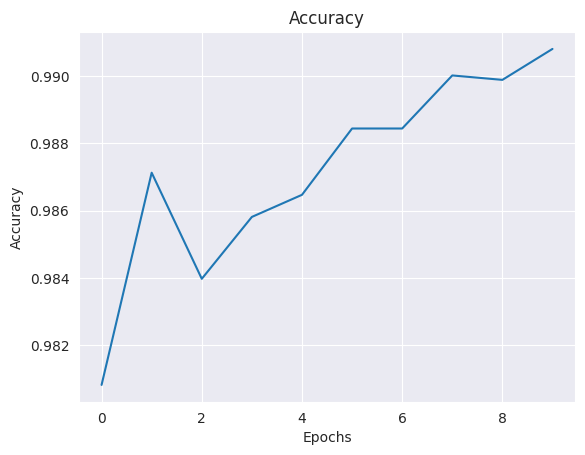

In [38]:
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")

for loss

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Loss')

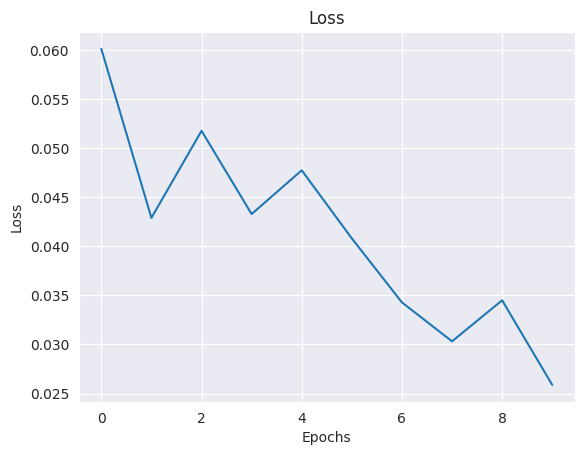

In [39]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")

In [49]:
label_encoder_keyword = LabelEncoder()
label_encoder_location = LabelEncoder()
label_encoder_text = LabelEncoder()
data['keyword'] = label_encoder_keyword.fit_transform(data['keyword'])
data['location'] = label_encoder_location.fit_transform(data['location'])
data['text'] = label_encoder_text.fit_transform(data['text'])
data.head()

,id,keyword,location,text,target
0,1,221,3341,5102,1
1,4,221,3341,3391,1
2,5,221,3341,2322,1
3,6,221,3341,658,1
4,7,221,3341,4373,1


In [50]:
X = data.drop('id', axis = 1)
X = X.values
y = data['target']

In [51]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [52]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
print("X_train.shape: ", X_train.shape[0])
print("y_train.shape: ", y_train.shape[0])
print("X_test.shape: ", X_test.shape[0])
print("y_test.shape: ", y_test.shape[0])

X_train.shape:  6090
y_train.shape:  6090
X_test.shape:  1523
y_test.shape:  1523


In [54]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)

KNeighborsClassifier()

In [55]:
classification_knn = (classification_report(y_test, predictions))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       874
           1       0.52      0.49      0.50       649

    accuracy                           0.59      1523
   macro avg       0.58      0.58      0.58      1523
weighted avg       0.59      0.59      0.59      1523



ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x7fa117b175b0>,
                estimator=KNeighborsClassifier())

0.5915955351280368

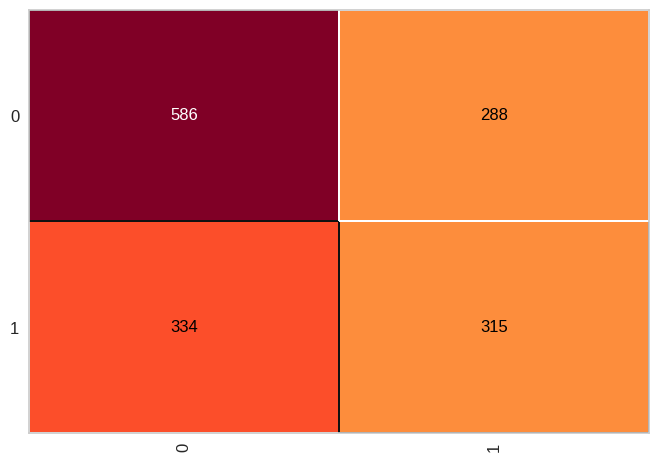

In [56]:
cm = ConfusionMatrix(knn_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [57]:
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)
predictions = logreg_classifier.predict(X_test)

LogisticRegression()

ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x7fa1cf2e3a30>,
                estimator=LogisticRegression())

1.0

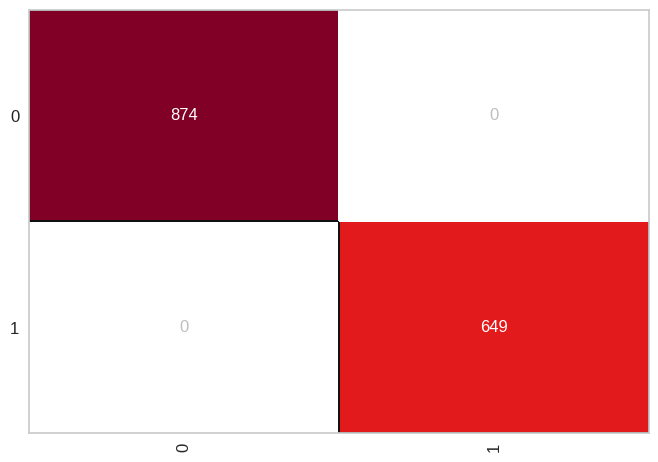

In [58]:
cm = ConfusionMatrix(logreg_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [59]:
classification_logistic_regression = (classification_report(y_test, predictions))
print(classification_logistic_regression)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       649

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [60]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

decision_tree = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = decision_tree, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [61]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  3
Algorithm:  entropy
Score:  1.0


In [62]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [63]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

DecisionTreeClassifier(random_state=0)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3468.0  2622.0       1.0     6090.0        6090.0
_______________________________________________
Confusion Matrix: 
 [[3468    0]
 [   0 2622]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    874.0  649.0       1.0     1523.0        1523.0
_______________________________________________
Confusion Matrix: 
 [[874   0]
 [  0 64

In [64]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=0)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


DecisionTreeClassifier(max_depth=1)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3468.0  2622.0       1.0     6090.0        6090.0
_______________________________________________
Confusion Matrix: 
 [[3468    0]
 [   0 2622]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    874.0  649.0       1.0     1523.0        1523.0
_______________________________________________
Confusion Matrix: 
 [[874   0]
 [  0 64

In [65]:
decision_tree_classifier = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree_classifier.fit(X_train, y_train)
predictions = decision_tree_classifier.predict(X_test)

DecisionTreeClassifier(max_depth=11, random_state=0)

ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x7fa114d92830>,
                estimator=DecisionTreeClassifier(max_depth=11, random_state=0))

1.0

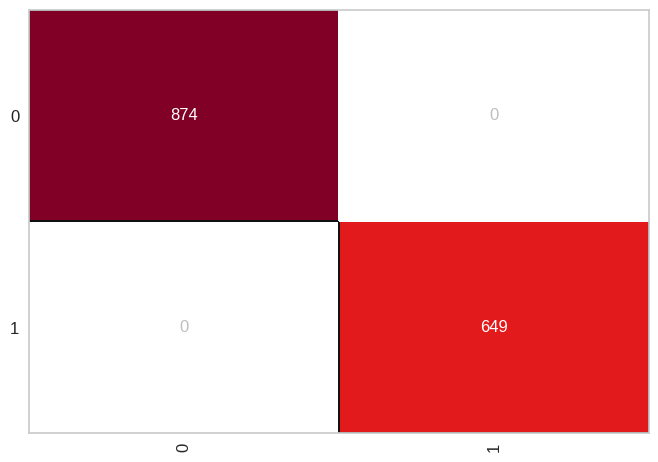

In [66]:
cm = ConfusionMatrix(decision_tree_classifier)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [67]:
classification_decision_tree = (classification_report(y_test, predictions))
print(classification_decision_tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       649

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [68]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

RandomForestClassifier()

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3468.0  2622.0       1.0     6090.0        6090.0
_______________________________________________
Confusion Matrix: 
 [[3468    0]
 [   0 2622]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    874.0  649.0       1.0     1523.0        1523.0
_______________________________________________
Confusion Matrix: 
 [[874   0]
 [  0 64

In [72]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=0)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})


RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=400)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3468.0  2622.0       1.0     6090.0        6090.0
_______________________________________________
Confusion Matrix: 
 [[3468    0]
 [   0 2622]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    874.0  649.0       1.0     1523.0        1523.0
_______________________________________________
Confusion Matrix: 
 [[874   0]
 [  0 64

In [73]:
columns = data.drop('id', axis = 1).columns
feature_imp = pd.Series(decision_tree_classifier.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

target      1.0
keyword     0.0
location    0.0
text        0.0
dtype: float64

In [74]:
k_values = [i for i in range (3,12)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

<Axes: >

Text(0.5, 0, 'K Values')

Text(0, 0.5, 'Accuracy Score')

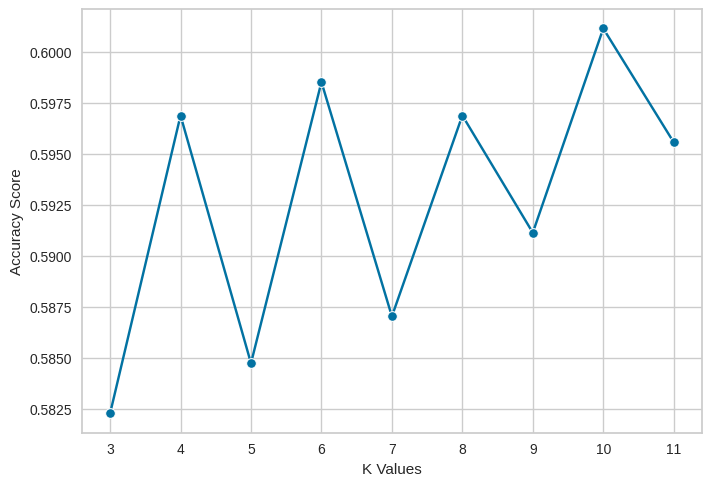

In [79]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [90]:
clf1 = setup(data = data,
             target = 'target',
             numeric_imputation = 'mean',
             categorical_features = ['keyword','location', 'text'],
             ignore_features = ['id'])

,Description,Value
0,Session id,3202
1,Target,target
2,Target type,Binary
3,Original data shape,"(7613, 5)"
4,Transformed data shape,"(7613, 4)"
5,Transformed train set shape,"(5329, 4)"
6,Transformed test set shape,"(2284, 4)"
7,Ignore features,1
8,Categorical features,3
9,Preprocess,True


In [91]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7215,0.7738,0.6009,0.7074,0.6497,0.4211,0.4251,0.3750
xgboost,Extreme Gradient Boosting,0.7138,0.7671,0.6135,0.6872,0.6479,0.4083,0.4104,0.2700
gbc,Gradient Boosting Classifier,0.6832,0.7371,0.4729,0.6927,0.5619,0.3274,0.3422,0.5610
rf,Random Forest Classifier,0.6594,0.7057,0.5441,0.6171,0.5780,0.2946,0.2963,0.8810
et,Extra Trees Classifier,0.6416,0.6795,0.5074,0.5976,0.5485,0.2548,0.2573,0.5660
ada,Ada Boost Classifier,0.6333,0.6769,0.4389,0.5996,0.5061,0.2260,0.2331,0.2350
dt,Decision Tree Classifier,0.6262,0.6195,0.5668,0.5648,0.5655,0.2376,0.2378,0.0560
knn,K Neighbors Classifier,0.5982,0.6063,0.5013,0.5340,0.5167,0.1737,0.1741,0.0640
nb,Naive Bayes,0.5707,0.5376,0.0009,0.1000,0.0017,0.0010,0.0071,0.0500
ridge,Ridge Classifier,0.5703,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3202, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [93]:
rf1  = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6548,0.7085,0.5109,0.6190,0.5598,0.2801,0.2836
1,0.6735,0.6974,0.5721,0.6329,0.6009,0.3259,0.3271
2,0.6135,0.6904,0.4672,0.5602,0.5095,0.1949,0.1971
3,0.6454,0.6851,0.5240,0.6000,0.5594,0.2650,0.2667
4,0.6398,0.7015,0.5066,0.5949,0.5472,0.2513,0.2535
5,0.6417,0.6693,0.5240,0.5941,0.5568,0.2580,0.2595
6,0.6642,0.7135,0.5502,0.6238,0.5847,0.3046,0.3063
7,0.6867,0.7390,0.6026,0.6449,0.6230,0.3555,0.3561
8,0.6923,0.7350,0.5764,0.6633,0.6168,0.3619,0.3644


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [94]:
tuned_rf = tune_model(rf1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6529,0.6836,0.6245,0.5909,0.6072,0.2967,0.2971
1,0.6435,0.7033,0.6157,0.5802,0.5975,0.2781,0.2785
2,0.6379,0.6787,0.5939,0.5763,0.5849,0.2639,0.2640
3,0.6435,0.6927,0.6376,0.5771,0.6058,0.2819,0.2831
4,0.6510,0.7112,0.6550,0.5837,0.6173,0.2985,0.3002
5,0.6492,0.6820,0.6507,0.5820,0.6144,0.2944,0.2959
6,0.6904,0.7389,0.6812,0.6290,0.6541,0.3748,0.3757
7,0.6529,0.7255,0.6943,0.5803,0.6322,0.3086,0.3130
8,0.6285,0.6942,0.6288,0.5603,0.5926,0.2533,0.2547


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


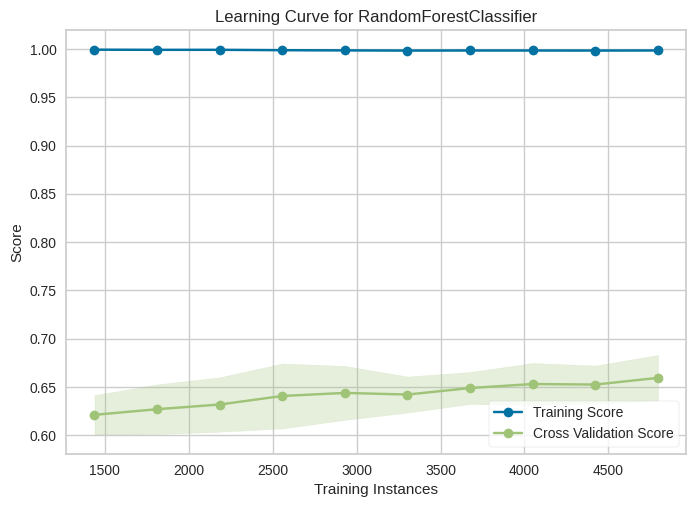

In [95]:
plot_model(estimator = tuned_rf, plot = 'learning')

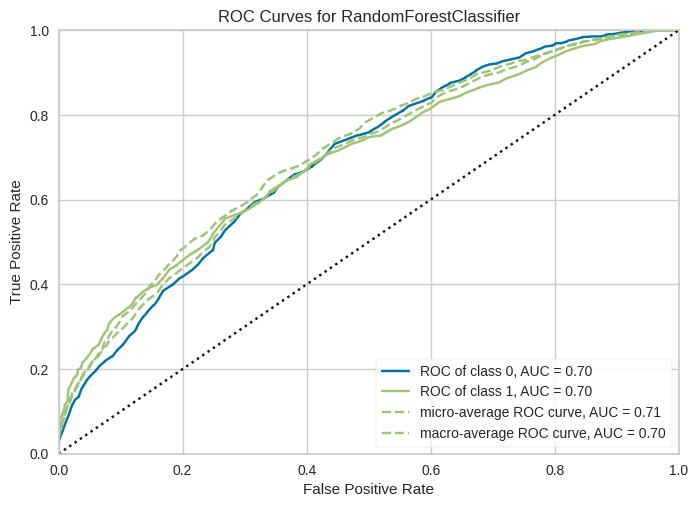

In [96]:
plot_model(estimator = tuned_rf, plot = 'auc')

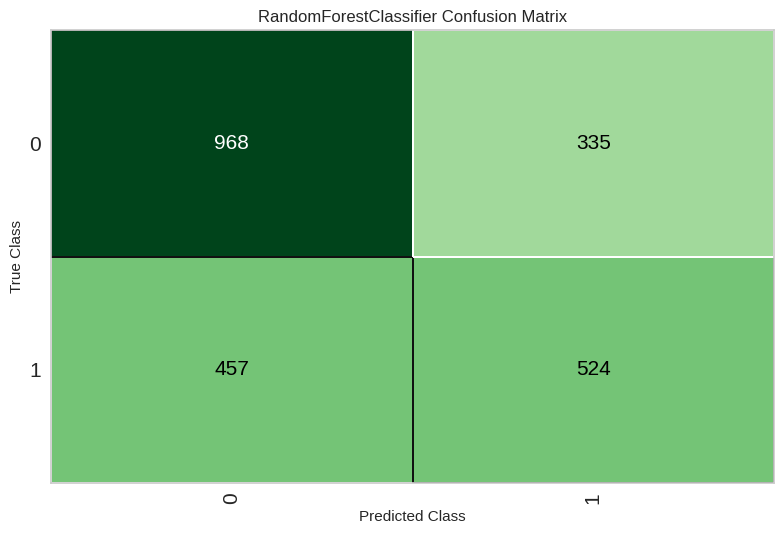

In [97]:
plot_model(estimator = tuned_rf, plot = 'confusion_matrix')

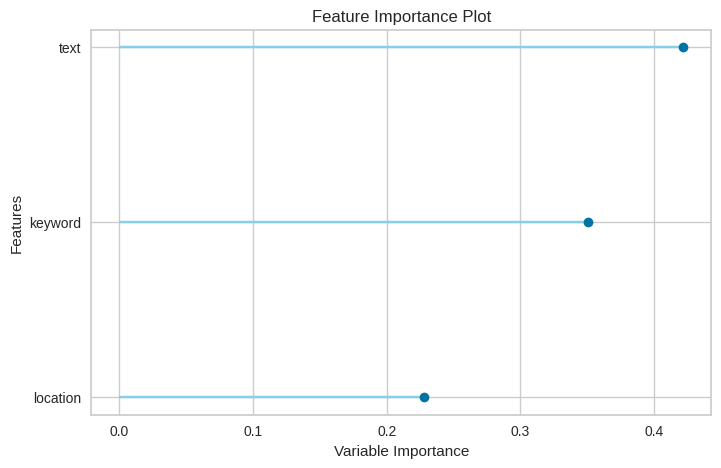

In [98]:
plot_model(estimator = tuned_rf, plot = 'feature')

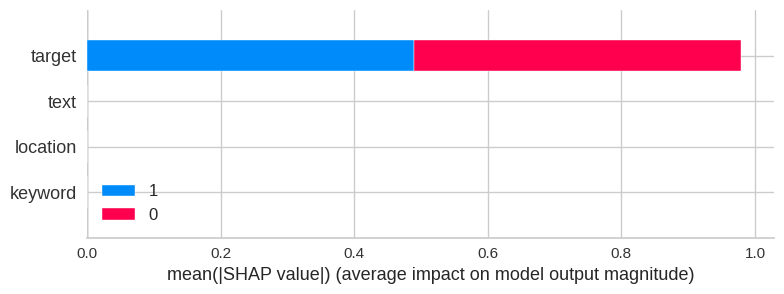

In [106]:
import shap
columns = data.drop('id', axis = 1).columns
explainer = shap.TreeExplainer(decision_tree_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,plot_type='bar',max_display=10,class_names=["1", "0"], feature_names = columns.tolist())

In [109]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [110]:
# # Get the model explainer object
#explainer = shap.KernelExplainer(knn_classifier.predict_proba, X_train)

# # Get shap values for the test data observation whose index is 0, i.e. first observation in the test set
#shap_values = explainer.shap_values(X_test)

# # Generate a force plot for this first observation using the derived shap values
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [ ]:
#import gradio as gra
#def user_greeting(name):
     #return "Hi! " + name + " Welcome to Project X!😎"

## define gradio interface and other parameters
#app =  gra.Interface(fn = user_greeting, inputs="text", outputs="text")
#app.launch()